# Machine Learning with Sklearn -- Regression

## Data

In [155]:
import pandas as pd
import numpy as np

house = pd.read_csv("../../../RepositoryData/data/hands-on-ml/housing.csv")

In [156]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [157]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [158]:
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [159]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualization

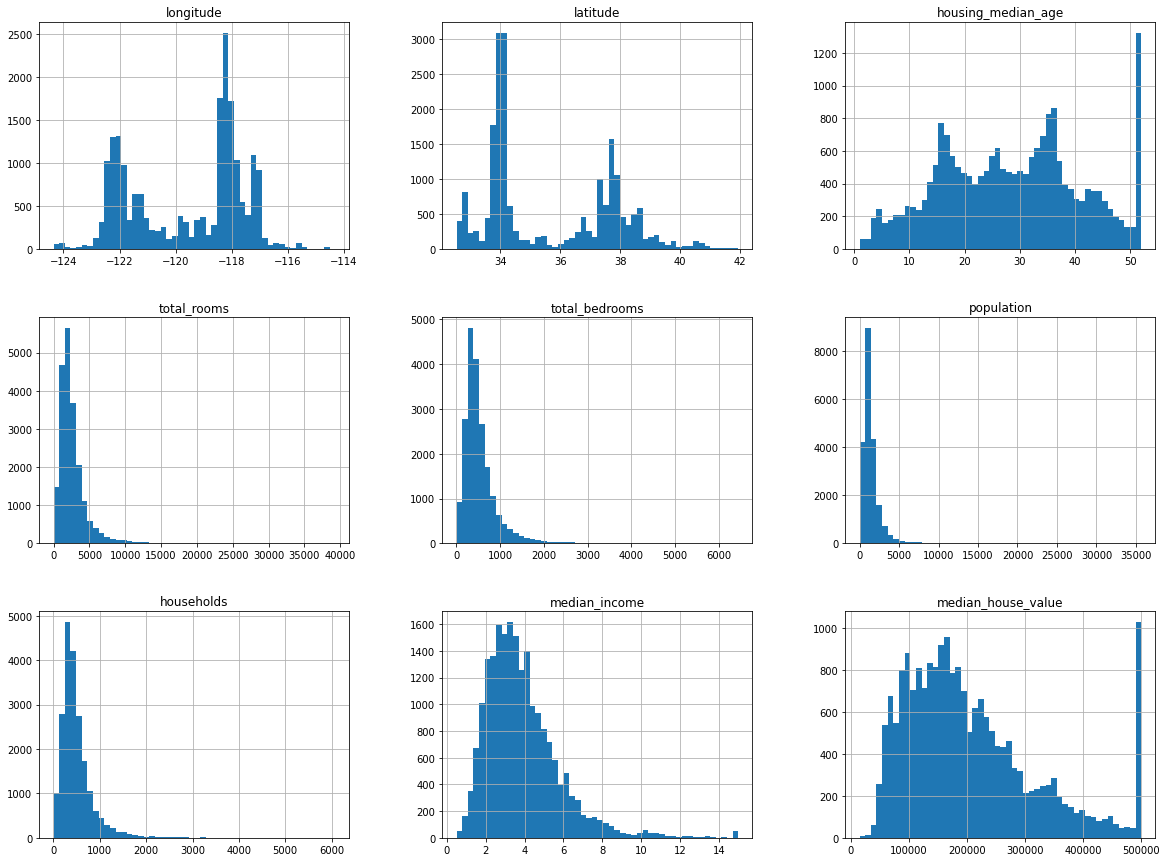

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.show()

## Train-Test Split

### Simple random sampling

In [161]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(house, test_size = 0.2, random_state=42)

In [162]:
len(train)

16512

In [163]:
len(test)

4128

### Stratified Random Sampling

The sampling should consider the income distributions.

In [164]:
house['income_cat'] = pd.cut(house['median_income'],
                            bins=[0,1.5, 3.0, 4.5, 6.0,np.inf],
                            labels=[1,2,3,4,5])

<AxesSubplot:>

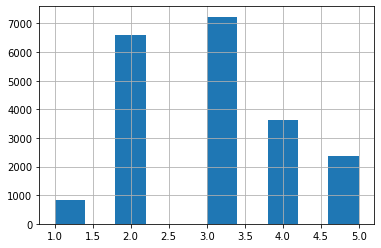

In [165]:
house['income_cat'].hist()

In [166]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [167]:
for train_index, test_index in splitter.split(house, house['income_cat']):
    train_strat = house.loc[train_index]
    test_strat = house.loc[test_index]

In [168]:
train_strat['income_cat'].value_counts()/len(train_strat)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [169]:
test_strat['income_cat'].value_counts()/len(test_strat)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [170]:
for set_ in (train_strat, test_strat):
    set_.drop("income_cat", axis = 1, inplace=True)

## Exploring Training Data

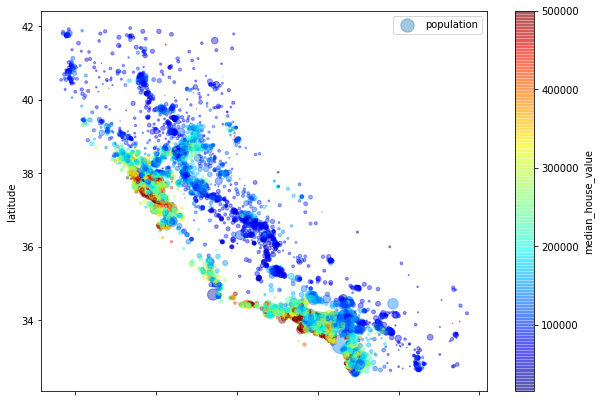

In [171]:
train_strat.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=train_strat["population"]/100, label="population",figsize=(10,7),
                c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

## size: population
## color: median house value

## Preparing Data for ML

- Wrap things in functions
    - Allow you to reproduce the same transformations easily on any dataset
    - Build a self-defined library of transformation functions
    - Allow you to apply the same transformation to new data in live system
    - Allow you to experiment with different transformations easily

In [172]:
housing = train_strat.drop("median_house_value", axis=1)
housing_labels = train_strat["median_house_value"].copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


### NA values

In [173]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [174]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [175]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [176]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### Data Type Conversion

- Categorical to Ordinal

In [177]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories='auto')

In [178]:
ocean_proximity_cat = housing[["ocean_proximity"]]
ocean_proximity_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [179]:
ocean_proximity_ordinal = ordinal_encoder.fit_transform(ocean_proximity_cat)
ocean_proximity_ordinal[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [180]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [181]:
pd.DataFrame(ocean_proximity_oridinal).value_counts()

0.0    7276
1.0    5263
4.0    2124
3.0    1847
2.0       2
dtype: int64

- One-hot encoding

In [182]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
ocean_proximity_onehot = onehot_encoder.fit_transform(ocean_proximity_cat)

In [183]:
ocean_proximity_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [184]:
ocean_proximity_onehot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Feature Scaling

In [185]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [186]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

housing_num_minmax = minmax_scaler.fit_transform(housing_num)
housing_num_standard = standard_scaler.fit_transform(housing_num)

In [187]:
housing_num_minmax

array([[0.24501992, 0.50478215, 0.7254902 , ..., 0.01981558, 0.06292009,
        0.15201859],
       [0.24103586, 0.47927736, 0.25490196, ..., 0.00849239, 0.02072442,
        0.40837368],
       [0.71215139, 0.02444208, 0.58823529, ..., 0.02614984, 0.08588499,
        0.1629081 ],
       ...,
       [0.79183267, 0.16471838, 0.15686275, ..., 0.05871801, 0.14245706,
        0.19119736],
       [0.6314741 , 0.1360255 , 0.58823529, ..., 0.03792147, 0.0660941 ,
        0.24569316],
       [0.18924303, 0.55579171, 1.        , ..., 0.03548306, 0.11893204,
        0.21207294]])

In [188]:
housing_num_standard

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

### Transformation Pipelines

In [189]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('standardizer', StandardScaler()),
])

In [190]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [191]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

- Handle all columns all at once

In [192]:
from sklearn.compose import ColumnTransformer

In [193]:
num_columns = list(housing_num)
cat_columns = ['ocean_proximity']

In [194]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', OneHotEncoder(), cat_columns)
])

In [195]:
housing_prepared = full_pipeline.fit_transform(housing)

```{important}
The output of the `full_pipeline` includes more columns than the original data frame `housing`. This is due to the one-hot encoding  transformation.
```

## Select and Train a Model

- Linear Regresssion

In [200]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmes = np.sqrt(lin_mse)
lin_rmes

69055.57008288472

- Decision Tree

In [203]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

tree_mse = mean_squared_error(housing_labels, tree_reg.predict(housing_prepared))
tree_rmes = np.sqrt(tree_mse)
tree_rmes

0.0

- Cross Validation to check over/under-fitting

In [204]:
from sklearn.model_selection import cross_val_score

- CV for Decision Tree

In [208]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_cv = np.sqrt(-tree_scores)
tree_rmse_cv

array([67139.82432539, 67382.97266737, 73570.81763384, 68716.64962785,
       67808.75573625, 75295.66005943, 66336.18100097, 69901.7711193 ,
       69017.19332426, 69541.31134573])

In [209]:
def display_cv_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [211]:
display_cv_scores(tree_rmse_cv)

Scores: [67139.82432539 67382.97266737 73570.81763384 68716.64962785
 67808.75573625 75295.66005943 66336.18100097 69901.7711193
 69017.19332426 69541.31134573]
Mean: 69471.1136840389
Standard deviation: 2721.856830394127


- CV for Linear Regression

In [213]:
linreg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
linreg_rmse_cv = np.sqrt(-linreg_scores)
display_cv_scores(linreg_rmse_cv)

Scores: [67452.77701485 67389.76532656 68361.84864912 74651.7801139
 68314.56738182 71640.79787192 65361.14176205 68571.62738037
 72475.91110732 68098.06828865]
Mean: 69231.82848965636
Standard deviation: 2656.3702353976896


- CV for Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_cv=np.sqrt(-forest_scores)
display_cv_scores(forest_rmse_cv)

Scores: [47632.49179689 46373.11835198 49272.19573687 50147.15388662
 49036.42363423 53397.31601372 48902.61322735 50348.23351741
 51248.22704525 49552.02150292]
Mean: 49590.979471321756
Standard deviation: 1821.8742073775495


```{important}
- Try different ML algorithms first, before spending too much time tweaking the hyperparameters of one single algorithm.

- The first goal is to shortlist a few (2 to 5) promising models.
```